In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

## Data Collection

In [2]:
book = pd.read_csv("C:/Users/manth/Assignment/Association rules/book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## Exploratory Data Analysis (EDA)

In [3]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
ChildBks     2000 non-null int64
YouthBks     2000 non-null int64
CookBks      2000 non-null int64
DoItYBks     2000 non-null int64
RefBks       2000 non-null int64
ArtBks       2000 non-null int64
GeogBks      2000 non-null int64
ItalCook     2000 non-null int64
ItalAtlas    2000 non-null int64
ItalArt      2000 non-null int64
Florence     2000 non-null int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [5]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
book.shape

(2000, 11)

In [7]:
# Frequency of books
book.sum(axis=0)

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

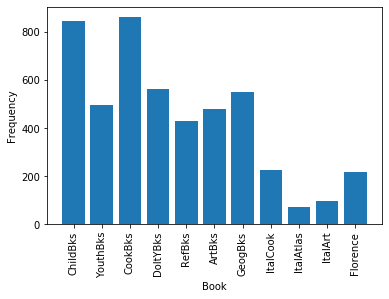

In [8]:
# Visualize book frequency
plt.bar (book.columns ,book.sum(axis=0))
plt.xticks(rotation = 90)
plt.xlabel("Book")
plt.ylabel("Frequency")
plt.show()

# Association Rule Mining

In [9]:
Book_Sales = apriori(book, min_support=0.005, max_len=3,use_colnames = True)
print("Raw Data:\n",Book_Sales.head())

# Sort decending order based on support  
Book_Sales.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",Book_Sales.head())

Raw Data:
    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)

Sorted as per Support value:
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (ChildBks, CookBks)


In [10]:
rules = association_rules(Book_Sales, metric="lift", min_threshold=1)
rules.sort_values('lift',ascending = False,inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
748,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
753,(ItalAtlas),"(RefBks, ItalArt)",0.0370,0.0200,0.0165,0.445946,22.297297,0.015760,1.768780
743,"(ArtBks, ItalAtlas)",(ItalArt),0.0180,0.0485,0.0165,0.916667,18.900344,0.015627,11.418000
746,(ItalArt),"(ArtBks, ItalAtlas)",0.0485,0.0180,0.0165,0.340206,18.900344,0.015627,1.488344
350,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
...,...,...,...,...,...,...,...,...,...
301,(Florence),(ChildBks),0.1085,0.4230,0.0485,0.447005,1.056748,0.002605,1.043408
411,(Florence),(DoItYBks),0.1085,0.2820,0.0315,0.290323,1.029513,0.000903,1.011727
410,(DoItYBks),(Florence),0.2820,0.1085,0.0315,0.111702,1.029513,0.000903,1.003605
307,(CookBks),(Florence),0.4310,0.1085,0.0475,0.110209,1.015749,0.000737,1.001920


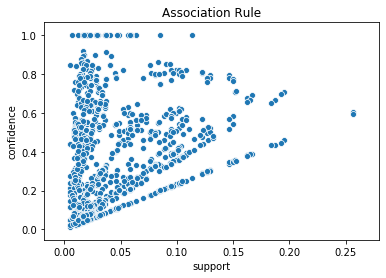

In [11]:
sns.scatterplot(x=rules['support'],y=rules['confidence'], data=rules)
plt.title("Association Rule")
plt.show()

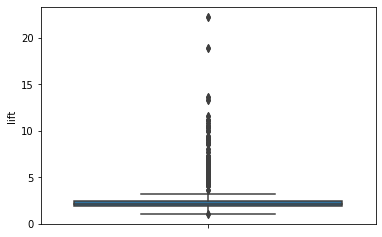

In [12]:
# Box plot to visuzlize lift
sns.boxplot(rules['lift'], data=rules,orient='v')
plt.show()

## With different values of support, confidence and length

# Association Rule Mining

In [13]:
Book_Sales1 = apriori(book, min_support=0.004, max_len=2,use_colnames = True)
print("Raw Data:\n",Book_Sales1.head())

# Sort decending order based on support  
Book_Sales1.sort_values('support',ascending = False,inplace=True)
print("\nSorted as per Support value:\n",Book_Sales1.head())

Raw Data:
    support    itemsets
0   0.4230  (ChildBks)
1   0.2475  (YouthBks)
2   0.4310   (CookBks)
3   0.2820  (DoItYBks)
4   0.2145    (RefBks)

Sorted as per Support value:
     support             itemsets
2     0.431            (CookBks)
0     0.423           (ChildBks)
3     0.282           (DoItYBks)
6     0.276            (GeogBks)
12    0.256  (ChildBks, CookBks)


In [14]:
rules1 = association_rules(Book_Sales1, metric="lift", min_threshold=2)
rules1.sort_values('lift',ascending = False,inplace=True)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
25,(ItalAtlas),(ItalArt),0.0370,0.0485,0.0165,0.445946,9.194762,0.014706,1.717341
24,(ItalArt),(ItalAtlas),0.0485,0.0370,0.0165,0.340206,9.194762,0.014706,1.459547
10,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
11,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
19,(ItalAtlas),(ItalCook),0.0370,0.1135,0.0230,0.621622,5.476842,0.018800,2.342893
18,(ItalCook),(ItalAtlas),0.1135,0.0370,0.0230,0.202643,5.476842,0.018800,1.207740
13,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
12,(RefBks),(ItalAtlas),0.2145,0.0370,0.0370,0.172494,4.662005,0.029063,1.163738
8,(ArtBks),(ItalArt),0.2410,0.0485,0.0485,0.201245,4.149378,0.036812,1.191229
9,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf


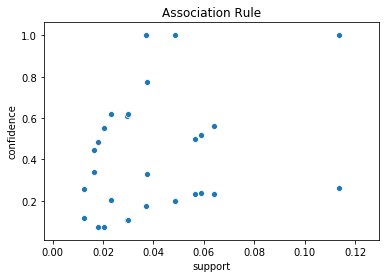

In [15]:
sns.scatterplot(x=rules1['support'],y=rules1['confidence'], data=rules1)
plt.title("Association Rule")
plt.show()

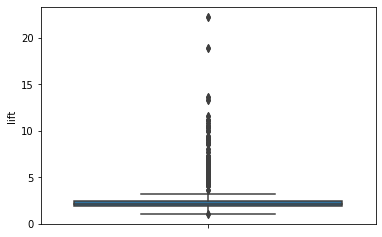

In [16]:
# Box plot to visuzlize lift
sns.boxplot(rules['lift'], data=rules1,orient='v')
plt.show()

In [17]:
A1 = rules1.antecedents.iloc[0:10]
B1 = rules1.consequents.iloc[0:10]
C1 = rules1.lift.iloc[0:10]

# frozen set error so change A & B:

A1 = A1.apply(lambda x: list(x)[0]).astype("unicode")
B1 = B1.apply(lambda x: list(x)[0]).astype("unicode")

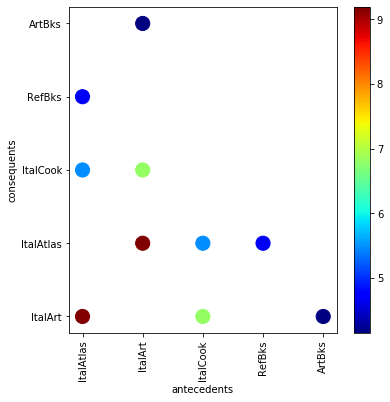

In [18]:
# plot figure against lift for top 10 'lift' value
fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111)
sc1 = plt.scatter(A1,B1, s = 200, c=C1, cmap=plt.cm.jet)
cbar = fig.colorbar(sc1, orientation='vertical')    
plt.xticks(rotation=90)
plt.xlabel("antecedents")
plt.ylabel("consequents")
plt.show()